In [1]:
import sys
import os

import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import json
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

In [19]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        obj = data[data.find('{') : data.rfind('}')+1]
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
#             waveform_data = pd.DataFrame(jsonObj['data'], columns=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])    
            waveform_data = pl.DataFrame(jsonObj['data'], schema=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])
            return waveform_data
    return []

In [40]:
filepaths = []

filepaths.append("data/negative/1361888.js") #negative
filepaths.append("data/negative/3240209.js") #negative
filepaths.append("data/positive/1054130.js") #positive

In [43]:
waveform = load_waveform(filepaths[0])

In [22]:
waveform.head()

peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width
f64,i64,i64,i64,i64,i64
23.5,18998,130,25705,0,0
22.25,56717,132,25705,0,0
23.0,3915,132,25705,347,0
24.25,19811,133,25705,0,0
25.25,8514,134,25705,0,0


In [31]:
waveform.describe()

describe,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width
str,f64,f64,f64,f64,f64,f64
"""count""",12215.0,12215.0,12215.0,12215.0,12215.0,12215.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",8.389153,3077.722472,189.368645,1662.002374,3.009251,7.624314
"""std""",2.121893,2384.198743,84.978648,144.148022,21.529813,32.956232
"""min""",3.75,-22461.0,0.0,1412.0,0.0,0.0
"""max""",24.0,29589.0,359.0,1912.0,490.0,489.0
"""median""",8.0,3085.0,187.0,1660.0,0.0,3.0


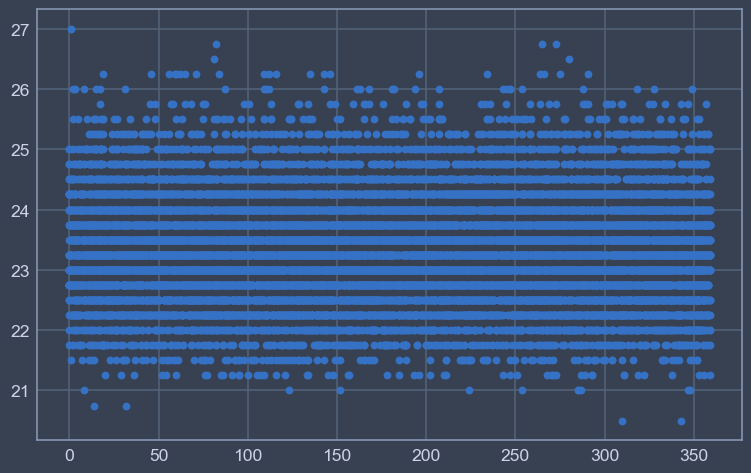

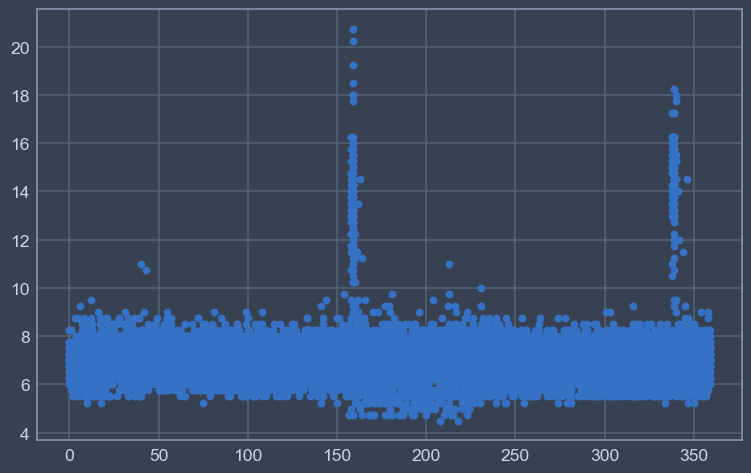

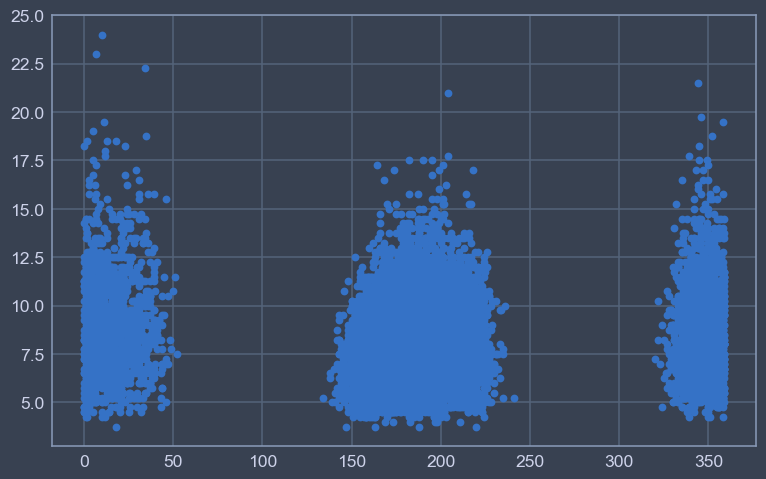

In [30]:
for filepath in filepaths:
  waveform = load_waveform(filepath)

  fig = plt.figure()
  fig.set_figwidth(20)     

  plt_1 = plt.subplot(1, 2, 1)    
  plt.plot(waveform["phase_angle"], waveform["peak_amplitude"], 'o')

# Data Loading & EDA

In [48]:
for root, dirs, files in os.walk("./data"):
    path = root.split(os.sep)
    print((len(path) - 1) * "---", os.path.basename(root))
    for file in files:
        print(len(path) * "---", file)
        with open(os.path.join(root, file)) as dataFile:
            data = dataFile.read()
            obj = data[data.find('{') : data.rfind('}')+1]
            jsonObj = json.loads(obj)
        df = pl.DataFrame(jsonObj['data'], schema=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])
        df.write_csv(os.path.join("./polars", os.path.basename(root), os.path.splitext(file)[0] + ".csv"))

 data
--- negative
------ 1011083.js
------ 1015896.js
------ 1029777.js
------ 1047582.js
------ 1056759.js
------ 1089139.js
------ 1152310.js
------ 1194291.js
------ 1220019.js
------ 1221514.js
------ 1244284.js
------ 1271333.js
------ 1303122.js
------ 1330029.js
------ 1361888.js
------ 1383620.js
------ 1398877.js
------ 1446539.js
------ 1463420.js
------ 1486626.js
------ 1533959.js
------ 1548970.js
------ 1575769.js
------ 1598234.js
------ 1605021.js
------ 1611175.js
------ 1614575.js
------ 1616779.js
------ 1670694.js
------ 1702322.js
------ 1783950.js
------ 1814570.js
------ 1869953.js
------ 1908368.js
------ 1934612.js
------ 1956316.js
------ 1986007.js
------ 2058789.js
------ 2092863.js
------ 2107672.js
------ 2206814.js
------ 2207573.js
------ 2311915.js
------ 2322660.js
------ 2358253.js
------ 2495477.js
------ 2523894.js
------ 2529744.js
------ 2544734.js
------ 2590843.js
------ 2710846.js
------ 2788964.js
------ 2805239.js
------ 2810569.js
------ 28

In [2]:
# load all into one big df
df = None
for root, dirs, files in os.walk("./polars"):
    path = root.split(os.sep)
    print((len(path) - 1) * "---", os.path.basename(root))
    for file in files:
        print(len(path) * "---", file)
        data = pl.read_csv(os.path.join("./polars", os.path.basename(root), file), columns=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])
        data = data.with_column(pl.lit(path[1]).alias("label"))
        data = data.with_column(pl.lit(os.path.splitext(file)[0]).alias("file"))
        if df is not None:
            df = df.vstack(data)
        else:
            df = data

 polars
--- negative
------ 1011083.csv
------ 1015896.csv
------ 1029777.csv
------ 1047582.csv
------ 1056759.csv
------ 1089139.csv
------ 1152310.csv
------ 1194291.csv
------ 1220019.csv
------ 1221514.csv
------ 1244284.csv
------ 1271333.csv
------ 1303122.csv
------ 1330029.csv
------ 1361888.csv
------ 1383620.csv
------ 1398877.csv
------ 1446539.csv
------ 1463420.csv
------ 1486626.csv
------ 1533959.csv
------ 1548970.csv
------ 1575769.csv
------ 1598234.csv
------ 1605021.csv
------ 1611175.csv
------ 1614575.csv
------ 1616779.csv
------ 1670694.csv
------ 1702322.csv
------ 1783950.csv
------ 1814570.csv
------ 1869953.csv
------ 1908368.csv
------ 1934612.csv
------ 1956316.csv
------ 1986007.csv
------ 2058789.csv
------ 2092863.csv
------ 2107672.csv
------ 2206814.csv
------ 2207573.csv
------ 2311915.csv
------ 2322660.csv
------ 2358253.csv
------ 2495477.csv
------ 2523894.csv
------ 2529744.csv
------ 2544734.csv
------ 2590843.csv
------ 2710846.csv
------ 278

C:\Users\chris\AppData\Local\Temp\ipykernel_12540\3956367190.py:9: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  data = data.with_column(pl.lit(path[1]).alias("label"))
C:\Users\chris\AppData\Local\Temp\ipykernel_12540\3956367190.py:10: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  data = data.with_column(pl.lit(os.path.splitext(file)[0]).alias("file"))


------ 5845704.csv
------ 5853735.csv
------ 5882549.csv
------ 5890467.csv
------ 5917454.csv
------ 5918882.csv
------ 5918942.csv
------ 5930019.csv
------ 5946140.csv
------ 5953998.csv
------ 5963771.csv
------ 5973582.csv
------ 5979849.csv
------ 6012845.csv
------ 6044737.csv
------ 6046631.csv
------ 6055966.csv
------ 6056358.csv
------ 6077894.csv
------ 6128779.csv
------ 6134906.csv
------ 6136698.csv
------ 6158799.csv
------ 6189252.csv
------ 6200231.csv
------ 6242047.csv
------ 6262196.csv
------ 6298129.csv
------ 6315021.csv
------ 6324263.csv
------ 6330159.csv
------ 6354491.csv
------ 6459973.csv
------ 6467777.csv
------ 6470079.csv
--- positive
------ 1054130.csv
------ 1167250.csv
------ 1313587.csv
------ 1428713.csv
------ 1494273.csv
------ 1603077.csv
------ 1609861.csv
------ 1730863.csv
------ 1814602.csv
------ 1820287.csv
------ 1900251.csv
------ 1935350.csv
------ 1965717.csv
------ 2055581.csv
------ 2060087.csv
------ 2061686.csv
------ 2108206.csv

In [66]:
df.head()

peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,label,file
f64,i64,i64,i64,i64,i64,str,str
23.5,18998,130,25705,0,0,"""negative""","""1011083"""
22.25,56717,132,25705,0,0,"""negative""","""1011083"""
23.0,3915,132,25705,347,0,"""negative""","""1011083"""
24.25,19811,133,25705,0,0,"""negative""","""1011083"""
25.25,8514,134,25705,0,0,"""negative""","""1011083"""


In [61]:
df.describe()

describe,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,label
str,f64,f64,f64,f64,f64,f64,str
"""count""",5.449586e6,5.449586e6,5.449586e6,5.449586e6,5.449586e6,5.449586e6,"""5449586"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",8.42767,1646.421847,179.300248,29759.804102,22.419605,47.449851,null
"""std""",7.580787,14821.505453,103.428875,13949.676056,80.575465,117.151652,null
"""min""",-0.49,-187175.0,0.0,0.0,0.0,0.0,"""negative"""
"""max""",42.75,148246.0,359.0,65535.0,500.0,500.0,"""unclassified"""
"""median""",6.25,1770.0,179.0,28383.0,0.0,0.0,null


In [59]:
df.filter(pl.col("label") == "negative").describe()

describe,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,label
str,f64,f64,f64,f64,f64,f64,str
"""count""",3.41109e6,3.41109e6,3.41109e6,3.41109e6,3.41109e6,3.41109e6,"""3411090"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",10.846391,2681.890623,179.89933,31117.355334,25.352788,52.313137,null
"""std""",8.140612,17843.571203,103.34788,13793.412471,85.546381,122.723001,null
"""min""",-0.49,-162252.0,0.0,0.0,0.0,0.0,"""negative"""
"""max""",42.75,132179.0,359.0,65535.0,500.0,500.0,"""negative"""
"""median""",9.0,2464.0,180.0,29895.0,0.0,0.0,null


In [60]:
df.filter(pl.col("label") == "positive").describe()

describe,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,label
str,f64,f64,f64,f64,f64,f64,str
"""count""",728057.0,728057.0,728057.0,728057.0,728057.0,728057.0,"""728057"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",5.313485,1068.596006,175.732072,33566.880224,12.193621,28.735376,null
"""std""",4.679338,6074.773424,102.845518,15416.233028,59.37075,89.616072,null
"""min""",-0.49,-187175.0,0.0,1412.0,0.0,0.0,"""positive"""
"""max""",38.75,148246.0,359.0,65257.0,490.0,500.0,"""positive"""
"""median""",4.25,1559.0,176.0,34599.0,0.0,0.0,null


<Axes: xlabel='peak_amplitude', ylabel='Density'>

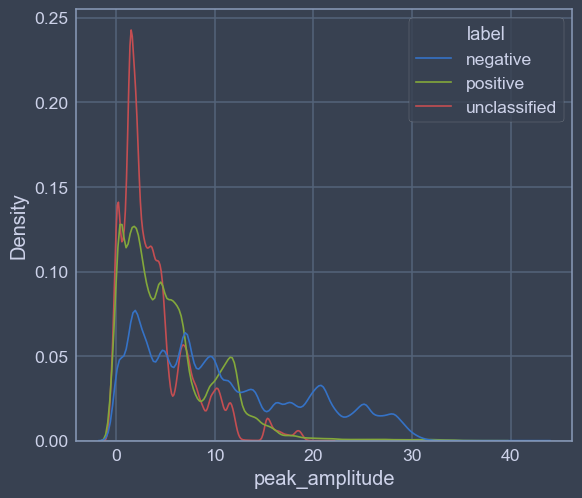

In [29]:
sns.kdeplot(data=df, x="peak_amplitude", hue="label", common_norm=False)

<Axes: xlabel='peak_amp_log', ylabel='Density'>

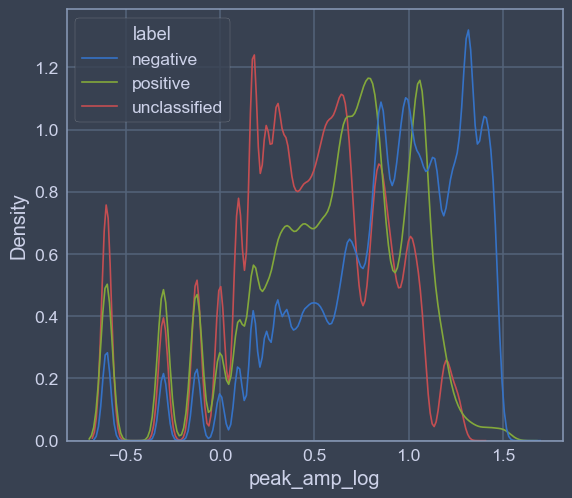

In [38]:
sns.kdeplot(data=df.filter(pl.col("peak_amp_log").is_not_nan()), x="peak_amp_log", hue="label", common_norm=False)

<Axes: xlabel='phase_angle', ylabel='Density'>

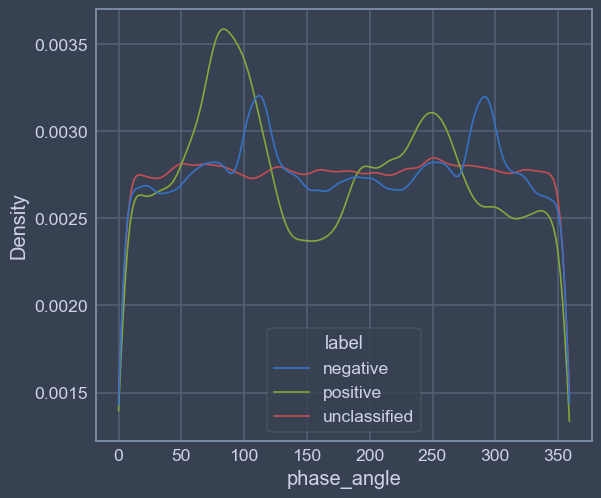

In [31]:
sns.kdeplot(data=df, x="phase_angle", hue="label", common_norm=False, cut=0)

In [3]:
df.sample(1000)

peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,label,file
f64,i64,i64,i64,i64,i64,str,str
9.75,3204,57,54926,0,0,"""positive""","""5869361"""
4.5,9515,183,46878,7,10,"""negative""","""1956316"""
6.75,-4883,79,40553,0,0,"""unclassified""","""1025150"""
3.75,7033,8,24994,0,143,"""negative""","""2107672"""
2.0,-2805,137,8018,0,1,"""negative""","""5234954"""
0.75,5557,343,40678,0,0,"""negative""","""5979849"""
2.5,2958,133,37838,25,77,"""negative""","""1575769"""
11.25,7170,234,4807,0,0,"""negative""","""6056358"""
15.0,10883,299,20087,0,0,"""negative""","""3630255"""


In [25]:
df = df.with_columns(df["peak_amplitude"].apply(np.log10).alias("peak_amp_log"))

C:\Users\chris\.virtualenvs\INF2008-XgWG3lwF\lib\site-packages\polars\internals\series\series.py:3836: RuntimeWarning: invalid value encountered in log10
  return wrap_s(self._s.apply_lambda(function, pl_return_dtype, skip_nulls))
C:\Users\chris\.virtualenvs\INF2008-XgWG3lwF\lib\site-packages\polars\internals\series\series.py:3836: RuntimeWarning: divide by zero encountered in log10
  return wrap_s(self._s.apply_lambda(function, pl_return_dtype, skip_nulls))


In [27]:
df.filter(pl.col("peak_amp_log").is_not_nan())

peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,label,file,peak_amp_log
f64,i64,i64,i64,i64,i64,str,str,f64
23.5,18998,130,25705,0,0,"""negative""","""1011083""",1.371068
22.25,56717,132,25705,0,0,"""negative""","""1011083""",1.34733
23.0,3915,132,25705,347,0,"""negative""","""1011083""",1.361728
24.25,19811,133,25705,0,0,"""negative""","""1011083""",1.384712
25.25,8514,134,25705,0,0,"""negative""","""1011083""",1.402261
24.0,-4625,134,25705,273,0,"""negative""","""1011083""",1.380211
25.25,-22732,135,25705,388,283,"""negative""","""1011083""",1.402261
24.25,26950,136,25705,0,283,"""negative""","""1011083""",1.384712
24.5,23001,136,25705,0,283,"""negative""","""1011083""",1.389166


<Axes: xlabel='phase_angle', ylabel='peak_amp_log'>

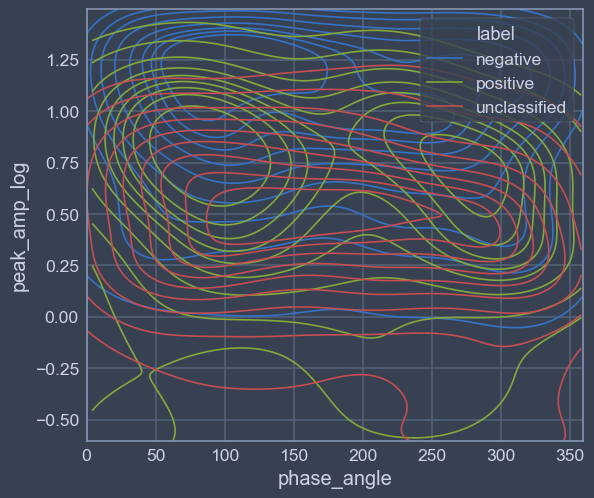

In [35]:
sns.kdeplot(
    data=df.sample(2000,shuffle=True).filter(pl.col("peak_amp_log").is_not_nan()),
    x="phase_angle",
    y="peak_amp_log",
    hue="label",
    hue_order=["negative", "positive", "unclassified"],
    cut=0,
    common_norm=False,
    multiple="layer"
#     log_scale=(False, 10)
)

<Axes: xlabel='peak_amp_log', ylabel='Count'>

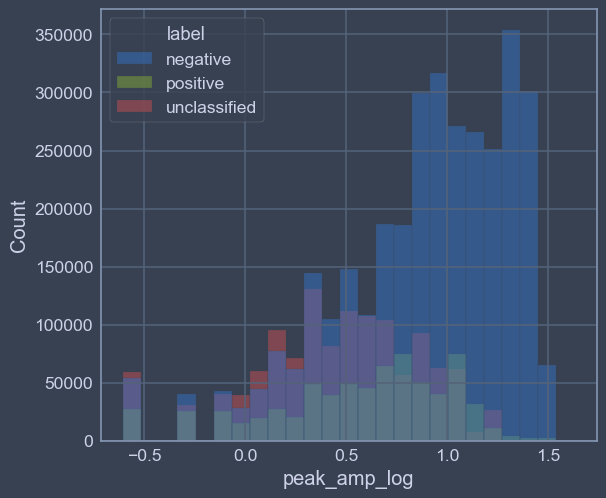

In [37]:
sns.histplot(data=df.filter(pl.col("peak_amp_log").is_not_nan()), x="peak_amp_log", hue="label", bins=25)

<Axes: xlabel='phase_angle', ylabel='peak_amplitude'>

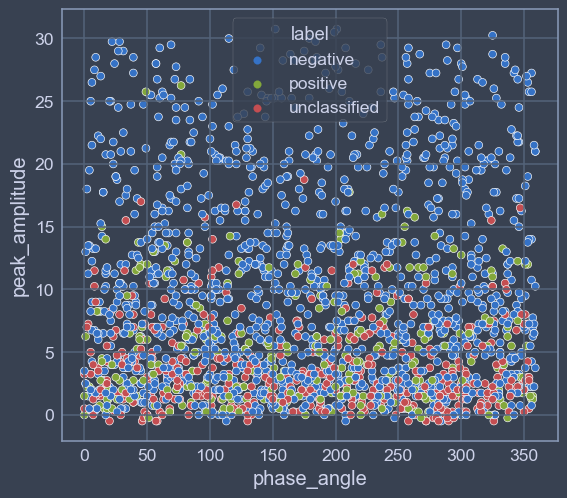

In [8]:
sns.scatterplot(data=df.sample(2000, shuffle=True), x="phase_angle", y="peak_amplitude", hue="label", hue_order=["negative", "positive", "unclassified"])